# Ensemble Learning

Classifiers such as Random Forest classifiers fall into the category of **ensemble methods**.

The approach followed by ensemble methods is simple: Instead of relying on the output of a single model, we **combine the output of multiple models** to obtain better predictive performance than with a single classifier / regressor.

To understand why this often results in better predictive performance, we can think of the following analogy: <br/>
Suppose you ask a complex question to thousands of random people, then aggregate
their answers. Often, you will find that this aggregated answer is better than
an expert's answer. This is called the *wisdom of the crowd*. 

Similarly, if we aggregate the predictions of a group of predictors (such as classifiers or regressors), we might get better predictions than with the best individual predictor. A group of predictors is called an ensemble. This technique is called Ensemble Learning, and an Ensemble Learning algorithm is called an Ensemble method.

In [4]:
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

## Voting Classifiers

Suppose you have trained a few classifiers, each one achieving about 80\% accuracy.
You may have a Logistic Regression classifier, an SVM classifier, a Random Forest classifier, etc..

![Ensemble_Method](imgs/ensemble_method.png)

A very simple way to create an even better classifier is to aggregate the predictions of
each classifier and predict the class that gets the most votes. This **majority-vote classifier** is called a **hard voting classifier**. Alternatively, we can also use a **soft-voting classifier**.

- **Hard voting (also known as majority voting)**: Every individual classifier votes for a class, and the majority wins
- **Soft voting:** In soft voting, every individual classifier provides a probability value that a specific data point belongs to a particular target class. The predictions are weighted by the classifier\'s importance and summed up. Then the target label with the greatest sum of weighted probabilities wins the vote.

**Example:** Let's assume we trained three classifiers to predict whether a given e-mail is spam or not. According to classifier A, there is a 65% chance that the e-mail is spam. Classifier B predicts it's 45\% and classifier C predicts it's 49\%.

- **Hard Voting:** If we assume that everything greater than 50\% is spam, 1 out of 3 classifiers predicts that the e-mails is spam. Hence, according to the hard-voting classifier, the e-mail isn't spam.

- **Soft Voting:** We assume that every classifier has equal importance. Averaging the probabilities results in a 53\% chance that the e-mail is spam. Hence, our final decision is that the e-mail is spam.

Somewhat surprisingly, this voting classifiers often achieve higher accuracy than the best classifier in the ensemble. In fact, even if each classifier is a weak learner (meaning it does only slightly better than random guessing), the ensemble can still be a strong learner (achieving high accuracy), provided there are a sufficient number of weak learners and they are sufficiently diverse.

## Bagging (Bootstrap Aggregation)

One way to get a diverse set of classifiers / regressors is to use very different training algorithms, as just discussed. Another approach is to use the same training algorithm for every predictor, but to **train them on different random subsets** of the training set. When **sampling** is performed **with replacement**, this method is called **bagging** (short for bootstrap (*) aggregating). When sampling is performed without replacement, it is called pasting.

To implement baggging, we first sample $n$ random subsets with replacement from the training set of $n$ samples. We then train a model on each individual subset and obtain an ensemble of $n$ models. Finally, assuming that we deal with a regression problem, we obtain the ensemble's prediction by averaging the predictions of the individual model. If we are dealing with a classification problem, we can apply majority voting.

(*) In statistics, resampling with replacement is called bootstrapping

![Bootstrapping](imgs/bootstrapping.png)

**Bagging can effectively reduce the variance of an model**, so it has strong beneficial effects on high variance models (*)

(*) Models that have many parameters and are likely to perfectly fit the training data. High variance models are prone to overfitting. An example of a low-variance model is a linear model. A model that fits a higher-degree polynomial tends to be a high-variance model.


#### Out-of-bag evaluation

With bagging, some instances may be sampled several times for any given predictor,
while others may not be sampled at all. If you randomly draw one instance from a dataset of size $m$, each instance in the dataset obviously has probability $\frac{1}{m}$ of getting picked, and therefore it has a probability $1 - \frac{1}{m}$ of not getting picked. If you draw $m$ instances with replacement, all draws are independent and therefore each instance has a probability $(1 - \frac{1}{m})^m$  of not getting picked. Now notice that $e^x = \lim\limits_{m\to \infty} (1+\frac{x}{m})^m$. So if $m$ is large, the ratio of out-of-bag instances will be about $e^{-1} = 0.37$. So roughly $63\%$ will be sampled.

In theory, since a predictor never sees the out-of-bag instances during training, we can evaluate the model performance on this samples without the need for a separate validation set or cross-validation.

### Bias - Variance Tradeoff

#### Explanation of the term "model variance"

We just stated that bagging is able to reduce the variance of a model. However, so far, we haven't really discussed what we mean when talking about the variance of a model. To get some understanding, let's take a look at the following example.

Let's assume we are given some function $h(x)=sin(x)$. We sample 50 datasets from this function with 20 points each.
Next, we fit a higher-degree polynomial(degree=6) on each individual dataset. The resulting polynomials are shown in the left plot. As can be seen, the shape of the fitted polynomial varies strongly depending on the samples in the dataset. In other words, for a given point $x$, the predicted value $y$ varies strongly for different polynomials. Hence, we say that the model has high variance. 

Following the idea of ensemble learning, we then try to aggregate the output of the predictors (polynomial models) by simply computing the mean y-value of all predictors estimated for a point $x$. For visualization purposes only, we repeat the entire experiment 100 times producing 100 ensemble models. The predictions of these 100 ensemble models are shown in the right plot. As can be seen, the outputs of the ensemble models for a given point $x$ hardly differ from each other. As a result, we say that the model has low variance.

We can also say that the variance captures how much your classifier changes if we train on a different training set. It answers the question how "over-specialized" is your classifier for a particular training set (overfitting)? If we have the best possible model for our training data, how far off is it from the average classifier? 

**Formula:**

$Var[\hat{h}] = \mathbb{E}[(\hat{h}(x) - \mathbb{E}[\hat{h}(x)])^2]$ where $\hat{h}$ is a model trained on a randomly drawn set of samples.

**How can we reduce the variance of a model?**
- Increase the number training samples
- Decrease the complexity of the model (e.g., decrease the degree of the polynomial). However, this will increase the **model bias**.
- Apply ensemble learning (e.g., bagging)

In [9]:
np.random.seed(42)

x_test = np.linspace(0, 2*np.pi, 500).reshape(-1, 1)
y_test = np.sin(x_test)

poly_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=6, include_bias=False)

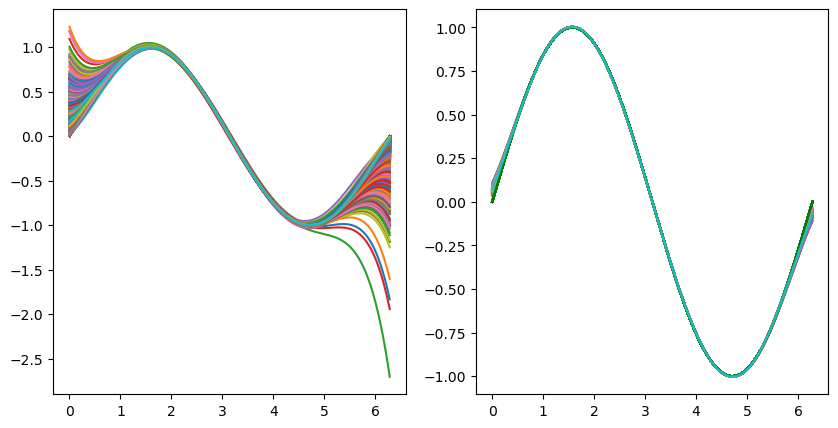

In [10]:
np.random.seed(42)

x_test = np.linspace(0, 2*np.pi, 500).reshape(-1, 1)
y_test = np.sin(x_test)

poly_reg = LinearRegression()
poly_features = PolynomialFeatures(degree=6, include_bias=False)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

num_ensembles = 100
num_models_per_ensemble = 50
num_training_samples = 20

for _ in range(num_ensembles):
    
    y_test_all_preds = None
    
    for _ in range(num_models_per_ensemble):

        x_train = np.random.uniform(0, 2*np.pi, num_training_samples).reshape(-1, 1)
        y_train = np.sin(x_train)

        x_train_poly = poly_features.fit_transform(x_train)
        x_test_poly = poly_features.transform(x_test)

        poly_reg.fit(x_train_poly, y_train)

        y_test_pred = poly_reg.predict(x_test_poly)

        y_test_all_preds = y_test_pred if y_test_all_preds is None else np.concatenate((y_test_all_preds, y_test_pred), axis=1)

        ax[0].plot(x_test, y_test_pred)

    # Compute the prediction of the ensemble
    y_test_pred_ensemble = np.mean(y_test_all_preds, axis=1)

    ax[1].plot(x_test, y_test, c='g')
    ax[1].plot(x_test, y_test_pred_ensemble)


#### Explanation of the term "model bias"

We just mentioned that reducing the complexity of a model tends to increase the model bias. The bias of an estimator is the "expected" difference between its estimates and the true value. 

Again, let's assume that we have some higher-degree polynomial. If given a small set of training samples, the model is able to "memorize" the data by simply choosing a polynomial that goes through all training points. However, if we have a lower-degree polynomial (e.g., deg=1 or 2), the polynomial model won't be able to fit the training and testing data perfectly.

The model bias aims to quantify the inability of the model to predict the right value caused by invalid assumptions made about the data. (x) We could also say that it's the error the model would make even when it's trained on infinity training data. The bias is inherent to the model.

A high-bias model typically tends to underfit training data.

**Formula:**

$Bias[\hat{h}] = \mathbb{E}[\hat{h}(x) - h(x)]$ where $\hat{h}$ is a model trained on a randomly drawn set of samples and $h(x)$ is the true value.

(*) https://rasbt.github.io/mlxtend/user_guide/evaluate/bias_variance_decomp/ provides a nice visualization
(x) e.g., we assume that there is some linear relationship but there's no linear relationship

#### Bias - Variance Tradeoff

Obviously, the ideal model has low variance and low bias. Unfortunately, it turns out that it is not possible to achieve both. Once we increase the model complexity to reduce the model bias, the model variance increases. This behavior is referred to as the bias-variance tradeoff.

See also http://scott.fortmann-roe.com/docs/BiasVariance.html

![bias_variance_tradeoff](imgs/bias_variance_tradeoff.png)

### Random Forest Classifiers

A Random Forest is an ensemble of Decision Trees, generally trained via the bagging method (or sometimes pasting), typically with `max_samples` set to the size of the training set. Note that the Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature among a **random subset of features**. This can be controlled via the `max_features` parameter.

The following example illustrates the performance of a random forest classifier compared to a decision tree classifier on the moon dataset. The moon dataset is a simple toy dataset often used to visualize clustering and classification algorithms. The generated points look like two interleaving half circles.

In [11]:
# Sample points from the moon dataset
x, y = make_moons(n_samples=500, noise=0.30, random_state=42)

In [12]:
# Train a decision tree as well as a random forest classifier to classify the moon dataset
decision_tree_classifier = DecisionTreeClassifier(max_depth=None)
random_forest_classifier = RandomForestClassifier(
    n_estimators=100, # Default
    bootstrap=True, # Default
    max_depth=None, # Default
    max_features=None, # Default: max_features=sqrt(num_features)
    max_samples=None # Default. We draw x.shape[0] samples.
)


decision_tree_classifier.fit(x, y)
random_forest_classifier.fit(x, y)

RandomForestClassifier(max_features=None)

In [13]:
def plot_decision_boundary(clf, X, y, alpha=1.0):
    
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    
    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
        
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

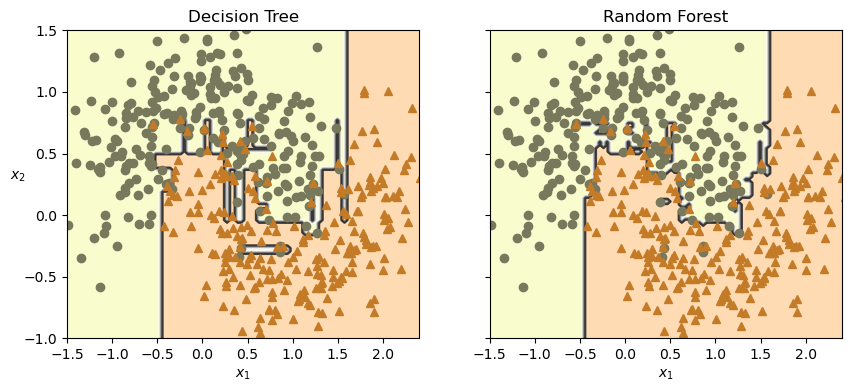

In [14]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(decision_tree_classifier, x, y)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(random_forest_classifier, x, y)
plt.title("Random Forest")
plt.ylabel("")
plt.show()